In [44]:
import pandas as pd
import matplotlib.pyplot as plt
# !pip install yfinance
import yfinance as yf

### 1. Load Financial Data of Company

In [45]:
# Set file path for specific company data
firmData = pd.read_csv('./morningstarData/sabr.csv', skiprows=2, index_col='Unnamed: 0')

In [46]:
firmData.head()

,2010-12,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,TTM
Revenue USD Mil,"2,832","2,856","3,039","3,050","2,631","2,961","3,373","3,598","3,867","3,975","2,668"
Gross Margin %,47.1,39.2,46.1,37.5,33.8,34.3,32.2,30.1,27.8,23.6,8.3
Operating Income USD Mil,339,313,-34,352,421,460,460,575,562,363,-364
Operating Margin %,12.0,11.0,-1.1,11.5,16.0,15.5,13.6,16.0,14.5,9.1,-13.7
Net Income USD Mil,-269,-66,-611,-100,69,545,243,243,338,159,-583


### 2. Read Metrics From Financial Data

### Functions for Metrics

In [47]:
# Return a specific stock metric of at a specific date
# Remove commas if any
def search_value(index_name, date):
    # return float(firmData.loc[index_name, date].replace(",", ""))
    return float(firmData.loc[index_name, date])
                 
# Return all historical data for a specific stock metric
# Remove commas if any
def historical_value(index_name):
    # return firmData.loc[index_name, ].str.replace(",","").astype(float)
    return firmData.loc[index_name, ].astype(float)

# TODO: Create function that acts like search_value, however dynamically uses most recent YE

##### (a) Shares Outstanding

In [48]:
# Read 2019 shares outstanding
# Note: This line might not work if the company doesn't have a Sept fiscal year end
# Note: Or, if the company does have Sept fiscal year end, might not have gone public in 2019
print(search_value('Shares Mil', '2019-12'))

# Read all historical data of shares outstanding
print(historical_value('Shares Mil'))

276.0
2010-12    175.0
2011-12    256.0
2012-12    177.0
2013-12    256.0
2014-12    247.0
2015-12    280.0
2016-12    283.0
2017-12    278.0
2018-12    278.0
2019-12    276.0
TTM        275.0
Name: Shares Mil, dtype: float64


##### (b) EPS

In [49]:
# Read 2019 EPS
print(search_value('Earnings Per Share USD', '2019-12'))

# Read all historical data of shares outstanding
print(historical_value('Earnings Per Share USD'))

0.57
2010-12   -1.71
2011-12   -0.39
2012-12   -3.65
2013-12   -0.54
2014-12    0.23
2015-12    1.95
2016-12    0.86
2017-12    0.87
2018-12    1.22
2019-12    0.57
TTM       -2.13
Name: Earnings Per Share USD, dtype: float64


##### (c) Dividend Rate

In [50]:
# Read 2019 dividend rate
print(search_value('Dividends USD', '2019-12'))

# Read historical dividend rate
# Note: NaN manipulation will be introduced later
print(historical_value('Dividends USD'))

0.56
2010-12     NaN
2011-12     NaN
2012-12     NaN
2013-12     NaN
2014-12    0.18
2015-12    0.36
2016-12    0.52
2017-12    0.56
2018-12    0.56
2019-12    0.56
TTM        0.42
Name: Dividends USD, dtype: float64


##### (d) Dividend Yield

In [51]:
# Read 2019 dividend yield
print(search_value('Payout Ratio % *', '2019-12'))

# Read historical dividend yield
# Note: TTM = Trailing Twelve Months
print(historical_value('Payout Ratio % *'))

65.9
2010-12     NaN
2011-12     NaN
2012-12     NaN
2013-12     NaN
2014-12    26.9
2015-12    40.9
2016-12    57.8
2017-12    79.7
2018-12    46.7
2019-12    65.9
TTM         NaN
Name: Payout Ratio % *, dtype: float64


##### (e) Debt/Equity Ratio

In [52]:
# Read 2019 D/E Ratio
print(search_value('Debt/Equity', '2019-12'))

# Read historical D/E ratio
print(historical_value('Debt/Equity'))

3.53
2010-12      NaN
2011-12      NaN
2012-12      NaN
2013-12      NaN
2014-12    36.55
2015-12     6.57
2016-12     5.26
2017-12     4.90
2018-12     3.45
2019-12     3.53
TTM        14.55
Name: Debt/Equity, dtype: float64


##### (f) Book Value Per Share

In [53]:
# Read 2019 book value per share
print(search_value('Book Value Per Share * USD', '2019-12'))

# Read historical book value per share
print(historical_value('Book Value Per Share * USD'))

3.46
2010-12     NaN
2011-12     NaN
2012-12     NaN
2013-12     NaN
2014-12    0.26
2015-12    1.67
2016-12    2.71
2017-12    2.34
2018-12    3.38
2019-12    3.46
TTM        1.00
Name: Book Value Per Share * USD, dtype: float64


##### (g) ROE (Return on Equity)

In [54]:
# Read 2019 ROE
print(search_value('Return on Equity %', '2019-12'))

# Read historical ROE
print(historical_value('Return on Equity %'))

16.64
2010-12       NaN
2011-12       NaN
2012-12       NaN
2013-12       NaN
2014-12       NaN
2015-12    192.59
2016-12     43.87
2017-12     36.85
2018-12     40.66
2019-12     16.64
TTM        -94.84
Name: Return on Equity %, dtype: float64


##### (h) Current Ratio

In [55]:
# Read 2019 current ratio
print(search_value('Current Ratio', '2019-12'))

# Read historical current ratio
print(historical_value('Current Ratio'))

1.09
2010-12     NaN
2011-12    0.61
2012-12    0.61
2013-12    0.76
2014-12    0.98
2015-12    0.78
2016-12    0.73
2017-12    0.99
2018-12    1.17
2019-12    1.09
TTM        2.27
Name: Current Ratio, dtype: float64


### 3. Get Complete Stock Price Dataframe

In [56]:
# Set ticker symbol
ticker = "SABR"
stock = yf.Ticker(ticker)

# Get complete history of stock prices
stock_price = stock.history(period='max')
stock_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-04-17,14.50,14.83,13.85,14.25,18382200,0.0,0
2014-04-21,14.25,14.54,14.08,14.39,1509800,0.0,0
2014-04-22,14.22,15.31,14.22,15.29,1391400,0.0,0
2014-04-23,14.88,15.01,14.47,14.56,974600,0.0,0
2014-04-24,14.69,14.84,14.31,14.55,339600,0.0,0


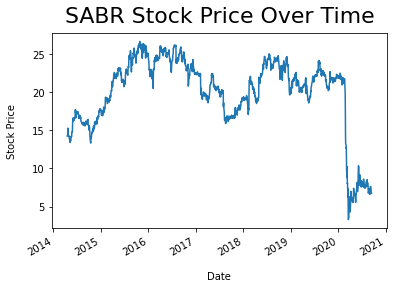

In [57]:
# Line graph of stock price over time
stock_price['Close'].plot()
plt.xlabel("Date", labelpad=15)
plt.ylabel("Stock Price", labelpad=15)
plt.title(f"{ticker} Stock Price Over Time", y=1.02, fontsize=22);

### 4. Calculate Price/Earnings (PE) & Price/Book Value (P/BV)

##### (a) Latest P/E

In [58]:
# Obtain the most recent closing price of the current stock
# TODO: Change based on current date, should just be close price of yesterday
latest_price = stock_price.loc['2020-09-11','Close']

# Obtain the most recent fiscal year end EPS
latest_eps = search_value('Earnings Per Share USD', '2019-12')

# Calculate the P/E ratio
latest_PtoE = latest_price/latest_eps
print(latest_PtoE)

12.087719298245615


##### (b) Latest P/BV

In [59]:
# Obtain the most recent closing price of the current stock
# TODO: Change based on current date, should just be close price of yesterday
latest_price = stock_price.loc['2020-09-11','Close']

# Obtain the most recent fiscal year end book value per share
latest_eps = search_value('Book Value Per Share * USD', '2019-12')

# Calculate the P/BV ratio
latest_PtoBV = latest_price/latest_eps
print(latest_PtoBV)

1.9913294797687862


### 5. Formatting to One Concise Dataframe

##### (a) Transpose Company Dataframe
For the convenience of calculation, we want to transpose the dataframe. Such that the time would be rows and metrics would be columns.

In [60]:
# Transpose dataframe
firmData = firmData.T
firmData.head()

,Revenue USD Mil,Gross Margin %,Operating Income USD Mil,Operating Margin %,Net Income USD Mil,Earnings Per Share USD,Dividends USD,Payout Ratio % *,Shares Mil,Book Value Per Share * USD,...,Key Ratios -> Efficiency Ratios,Efficiency,Days Sales Outstanding,Days Inventory,Payables Period,Cash Conversion Cycle,Receivables Turnover,Inventory Turnover,Fixed Assets Turnover,Asset Turnover
2010-12,"2,832",47.1,339,12.0,-269,-1.71,NaN,NaN,175,NaN,...,NaN,2010-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12,"2,856",39.2,313,11.0,-66,-0.39,NaN,NaN,256,NaN,...,NaN,2011-12,51.40,NaN,35.58,NaN,7.10,NaN,6.69,0.54
2012-12,"3,039",46.1,-34,-1.1,-611,-3.65,NaN,NaN,177,NaN,...,NaN,2012-12,50.16,NaN,33.09,NaN,7.28,NaN,7.27,0.61
2013-12,"3,050",37.5,352,11.5,-100,-0.54,NaN,NaN,256,NaN,...,NaN,2013-12,51.91,NaN,22.90,NaN,7.03,NaN,6.72,0.64
2014-12,"2,631",33.8,421,16.0,69,0.23,0.18,26.9,247,0.26,...,NaN,2014-12,55.29,NaN,23.64,NaN,6.60,NaN,5.01,0.55


##### (b) Extract metrics we need
The financial data contains a lot of metrics, we are not going to use most of them. So, let's create a smaller dataframe with whatever metrics we will use.

In [61]:
col_names = ['Shares Mil','Earnings Per Share USD','Dividends USD',
            'Payout Ratio % *', 'Debt/Equity', 'Book Value Per Share * USD',
            'Return on Equity %', 'Current Ratio']
firm_df = firmData[col_names]
firm_df.head()

,Shares Mil,Earnings Per Share USD,Dividends USD,Payout Ratio % *,Debt/Equity,Book Value Per Share * USD,Return on Equity %,Current Ratio
2010-12,175,-1.71,NaN,NaN,NaN,NaN,NaN,NaN
2011-12,256,-0.39,NaN,NaN,NaN,NaN,NaN,0.61
2012-12,177,-3.65,NaN,NaN,NaN,NaN,NaN,0.61
2013-12,256,-0.54,NaN,NaN,NaN,NaN,NaN,0.76
2014-12,247,0.23,0.18,26.9,36.55,0.26,NaN,0.98


##### (c) Rename Columns

Now we have a concise dataframe `firm_df`, which is easier to use. Now let's get rid of the column special symbols and unify the column name style by renaming them.

In [62]:
new_col = ['shares_outstanding', 'earning_per_share', 'dividend_rate', 
           'dividend_yield', 'debt_to_equity', 'book_value_per_share',
          'return_on_equity', 'current_ratio']
firm_df.columns = new_col
firm_df.head()

,shares_outstanding,earning_per_share,dividend_rate,dividend_yield,debt_to_equity,book_value_per_share,return_on_equity,current_ratio
2010-12,175,-1.71,NaN,NaN,NaN,NaN,NaN,NaN
2011-12,256,-0.39,NaN,NaN,NaN,NaN,NaN,0.61
2012-12,177,-3.65,NaN,NaN,NaN,NaN,NaN,0.61
2013-12,256,-0.54,NaN,NaN,NaN,NaN,NaN,0.76
2014-12,247,0.23,0.18,26.9,36.55,0.26,NaN,0.98


Now the dataframe looks great! Attention, do not get the order of new column (`new_col`) names wrong. It should be in exactly the same order as current column.